# Emotion Detection Feature Extraction #

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features

# Load the pre-trained VGG16 model without top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of VGG16
model = Model(inputs=base_model.input, outputs=base_model.output)

# Specify folder paths for emotion of child face image sets
angry_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
fear_folder_path = '/Users/isurudissanayake/Desktop/ASD/Fear'
joy_folder_path = '/Users/isurudissanayake/Desktop/ASD/Happy'
# natural_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
sadness_folder_path = '/Users/isurudissanayake/Desktop/ASD/Sad'
# surprise_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'

# Extract features for angry child faces
angry_features = extract_features(model, angry_folder_path)

# Extract features for fear child faces
fear_features = extract_features(model, fear_folder_path)

# Extract features for joy child faces
joy_features = extract_features(model, joy_folder_path)

# Extract features for natural child faces
# natural_features = extract_features(model, natural_folder_path)

# Extract features for sadness child faces
sadness_features = extract_features(model, sadness_folder_path)

# Extract features for surprise child faces
# surprise_features = extract_features(model, surprise_folder_path)

# Save the extracted features for later use in training
np.save('/Users/isurudissanayake/Desktop/FASD/Anger/Anger.npy', angry_features)
np.save('/Users/isurudissanayake/Desktop/FASD/Fear/Fear.npy', fear_features)
np.save('/Users/isurudissanayake/Desktop/FASD/Haapy/Happy.npy', joy_features)
# np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy', natural_features)
np.save('/Users/isurudissanayake/Desktop/FASD/Sad/Sad.npy', sadness_features)
# np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy', surprise_features)


1/1 [==============================] - 0s 135ms/step


# Emotion Detection Model Training #

/Users/isurudissanayake/Desktop/Tensorflow/env/lib/python3.10/site-packages/keras/preprocessing/image.py:2092: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1027, 7, 7, 512) (512 channels).
  warnings.warn(
/Users/isurudissanayake/Desktop/Tensorflow/env/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1027, 7, 7, 512) (512 channels).
  warnings.warn(
2024-03-30 15:40:17.659924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for p

Epoch 1/100
32/32 [==============================] - 6s 164ms/step - loss: 24.9585 - accuracy: 0.5579 - val_loss: 4.4069 - val_accuracy: 0.7596
Epoch 2/100
32/32 [==============================] - 5s 145ms/step - loss: 2.2461 - accuracy: 0.6251 - val_loss: 0.9537 - val_accuracy: 0.7370
Epoch 3/100
32/32 [==============================] - 5s 141ms/step - loss: 1.0652 - accuracy: 0.6933 - val_loss: 0.8554 - val_accuracy: 0.7732
Epoch 4/100
32/32 [==============================] - 5s 145ms/step - loss: 1.0529 - accuracy: 0.7303 - val_loss: 0.8762 - val_accuracy: 0.7710
Epoch 5/100
32/32 [==============================] - 5s 148ms/step - loss: 0.9383 - accuracy: 0.7390 - val_loss: 1.0227 - val_accuracy: 0.7710
Epoch 6/100
32/32 [==============================] - 5s 142ms/step - loss: 0.9120 - accuracy: 0.7381 - val_loss: 0.9038 - val_accuracy: 0.7732
Epoch 7/100
32/32 [==============================] - 5s 140ms/step - loss: 0.9216 - accuracy: 0.7439 - val_loss: 0.8135 - val_accuracy: 0.768

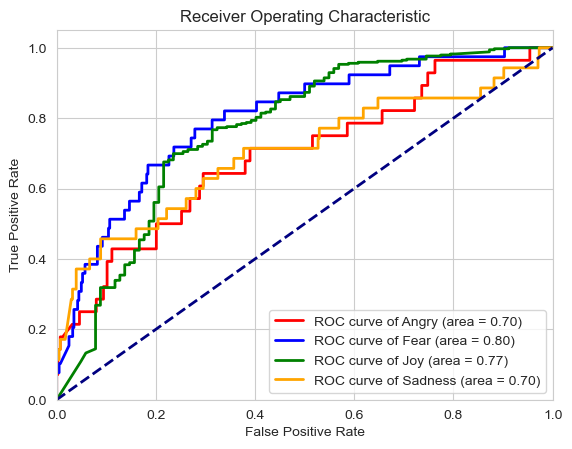

Root Mean Squared Error (RMSE): 0.6335302236023843
Mean Absolute Error (MAE): 0.2743764172335601


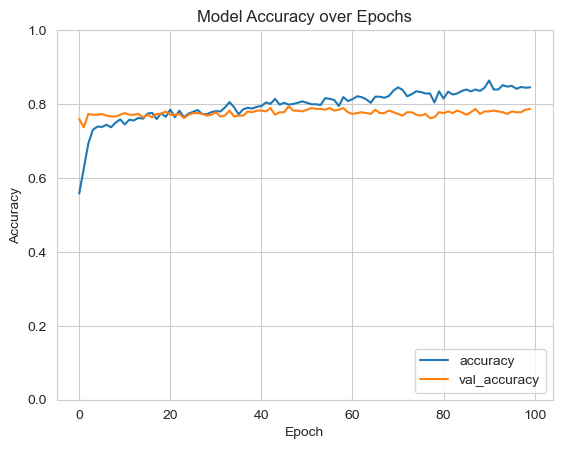

In [6]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the extracted features for emotions
angry_features = np.load('/Users/isurudissanayake/Desktop/FASD/Anger/Anger.npy')
fear_features = np.load('/Users/isurudissanayake/Desktop/FASD/Fear/Fear.npy')
joy_features = np.load('/Users/isurudissanayake/Desktop/FASD/Haapy/Happy.npy')
sadness_features = np.load('/Users/isurudissanayake/Desktop/FASD/Sad/Sad.npy')

# Assign labels
angry_labels = np.ones(angry_features.shape[0]) * 0
fear_labels = np.ones(fear_features.shape[0]) * 1
joy_labels = np.ones(joy_features.shape[0]) * 2
sadness_labels = np.ones(sadness_features.shape[0]) * 3

# Combine features and labels
X = np.vstack([angry_features, fear_features, joy_features, sadness_features])
y = np.concatenate([angry_labels, fear_labels, joy_labels, sadness_labels])

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Model definition
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 emotions

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=100,
                    validation_data=(X_test, y_test))

# Save the trained model
model.save('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_names = ['Angry', 'Fear', 'Joy', 'Sadness']
report = classification_report(y_test, y_pred_classes, target_names=class_names, zero_division=0)
print("Classification Report:")
print(report)

# ROC Curve and AUC (only applicable for binary or multi-class classification)
if len(class_names) > 1:
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    colors = ['red', 'blue', 'green', 'orange']
    for i, color in zip(range(len(class_names)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_classes, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_classes)
print("Mean Absolute Error (MAE):", mae)

# Learning Curve
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model Accuracy over Epochs')
plt.legend(loc='lower right')
plt.show()


In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from skimage.segmentation import mark_boundaries
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer

def show_image(image):
    # Display the image inline
    display(Image.fromarray(image))


# Provide the path to your image file
image_path = "/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0579.jpg"

# Check if the file exists
if Path(image_path).is_file():
    model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
    target_size = (224, 224)

    # Load the pre-trained VGG16 model with top layers included
    base_model = VGG16(weights='imagenet', include_top=True)

    # Take the output of the base model up to the last convolutional layer
    x = base_model.get_layer('block5_pool').output

    # Add a new dense layer for output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Create a new model that takes the input of VGG16 and outputs the desired layer
    model = Model(inputs=base_model.input, outputs=predictions)

    # Process the input image
    img = np.array(Image.open(image_path).resize(target_size))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    img = preprocess_input(img)  # Preprocess the image

    # Preprocess the image for the explainer by dividing pixel values by 255
    img_scaled = img / 255.0

    # Predict ASD probability using the full VGG16 model
    prediction = model.predict(img)[0][0]  # Access the first element for ASD probability

    rounded_prediction = round(prediction, 2)
    print(f"Predicted probability: {rounded_prediction:.2f}")

    if rounded_prediction > 0.5:
        print(f"Predicted ASD with probability: {rounded_prediction:.2f}")

    else:
        print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")
else:
    print("Error: Image file not found.")

1/1 [==============================] - 0s 284ms/step
Predicted probability: 0.12
Predicted non-ASD with probability: 0.88


In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer

# Load the trained model
model = load_model('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Define a function to preprocess input image and extract features
def preprocess_image(image_path, feature_extraction_model):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    # Reshape the features to match the expected input shape of (None, 14, 14, 512)
    features = np.reshape(features, (features.shape[0], 7, 7, 512))

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, model, vgg16)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)


1/1 [==============================] - ETA: 0s

2024-03-27 19:25:22.990482: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 26ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.47, 'Fear': 0.67, 'Joy': 91.62, 'Sad': 7.24}


# ASD Detection Feature Extraction #

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import time
import os

def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=(224, 224))  # Load image with target size (224, 224)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features

# Load the pre-trained VGG16 model with top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of VGG16
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Adjust the shape of the base model to (None, 14, 14, 512)
model = Model(inputs=model.input, outputs=model.output[:, 0:14, 0:14, :])

# Specify folder paths for ASD and non-ASD child face image sets
asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD'
non_asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD'

start_time = time.time()
asd_features = extract_features(model, asd_folder_path)

end_time = time.time()
elapsed_time = end_time - start_time  # Calculate elapsed time in seconds

print("Extract Features for ASD Child Faces, time:", elapsed_time, "seconds")

# Extract features for non-ASD child faces
start_time = time.time()
non_asd_features = extract_features(model, non_asd_folder_path)

end_time = time.time()
elapsed_time = end_time - start_time  # Calculate elapsed time in seconds

print("Extract Features for Non-ASD Child Faces, time:", elapsed_time, "seconds")

# Save the extracted features for later use in training
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/asd_features.npy', asd_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/non_asd_features.npy', non_asd_features)


1/1 [==============================] - 0s 126ms/step
Extract Features for ASD Child Faces, time: 164.2479727268219 seconds
1/1 [==============================] - 0s 144ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/child-1617.png: cannot identify image file <_io.BytesIO object at 0x14776d720>
1/1 [==============================] - 0s 224ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/additional1178.png: cannot identify image file <_io.BytesIO object at 0x153fbd860>
1/1 [==============================] - 0s 187ms/step


In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import time
import os

def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=(224, 224))  # Load image with target size (224, 224)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features

# Load the pre-trained VGG16 model with top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of VGG16
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Adjust the shape of the base model to (None, 14, 14, 512)
model = Model(inputs=model.input, outputs=model.output[:, 0:14, 0:14, :])

# Specify folder paths for ASD and non-ASD child face image sets
asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD'
non_asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD'

start_time = time.time()
asd_features = extract_features(model, asd_folder_path)

end_time = time.time()
elapsed_time = end_time - start_time  # Calculate elapsed time in seconds

print("Extract Features for ASD Child Faces, time:", elapsed_time, "seconds")

# Extract features for non-ASD child faces
start_time = time.time()
non_asd_features = extract_features(model, non_asd_folder_path)

end_time = time.time()
elapsed_time = end_time - start_time  # Calculate elapsed time in seconds

print("Extract Features for Non-ASD Child Faces, time:", elapsed_time, "seconds")

# Save the extracted features for later use in training
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/asd_features.npy', asd_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/non_asd_features.npy', non_asd_features)


1/1 [==============================] - 0s 145ms/step
Extract Features for ASD Child Faces, time: 164.29342675209045 seconds
1/1 [==============================] - 0s 165ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/child-1617.png: cannot identify image file <_io.BytesIO object at 0x172d62d10>
1/1 [==============================] - 0s 151ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/additional1178.png: cannot identify image file <_io.BytesIO object at 0x284fc92c0>
1/1 [==============================] - 0s 145ms/step
Extract Features for Non-ASD Child Faces, time: 1679.8427200317383 seconds


# ASD Detection Model Train #

Epoch 1/100
175/175 [==============================] - 4s 22ms/step - loss: 2.3164 - accuracy: 0.8663 - val_loss: 0.2306 - val_accuracy: 0.9120
Epoch 2/100
175/175 [==============================] - 4s 21ms/step - loss: 0.2034 - accuracy: 0.9293 - val_loss: 0.2143 - val_accuracy: 0.9248
Epoch 3/100
175/175 [==============================] - 3s 20ms/step - loss: 0.1486 - accuracy: 0.9492 - val_loss: 0.2141 - val_accuracy: 0.9291
Epoch 4/100
175/175 [==============================] - 4s 21ms/step - loss: 0.1030 - accuracy: 0.9633 - val_loss: 0.2500 - val_accuracy: 0.9298
Epoch 5/100
175/175 [==============================] - 4s 21ms/step - loss: 0.1132 - accuracy: 0.9588 - val_loss: 0.2349 - val_accuracy: 0.9392
Epoch 6/100
175/175 [==============================] - 4s 20ms/step - loss: 0.0730 - accuracy: 0.9740 - val_loss: 0.3085 - val_accuracy: 0.9298
Epoch 7/100
175/175 [==============================] - 4s 20ms/step - loss: 0.0620 - accuracy: 0.9782 - val_loss: 0.2793 - val_accuracy:

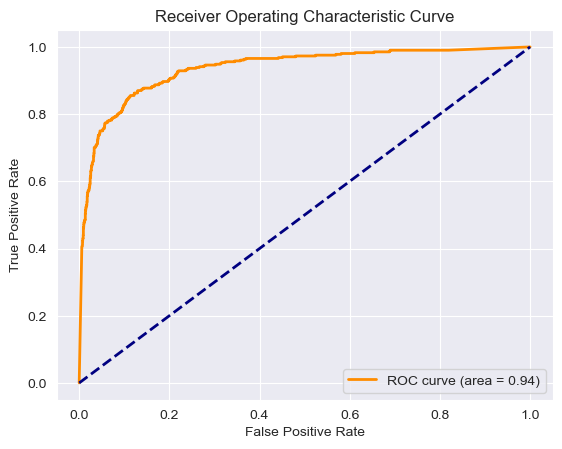

Root Mean Squared Error (RMSE): 0.2698375275034312
Mean Absolute Error (MAE): 0.072812291249165


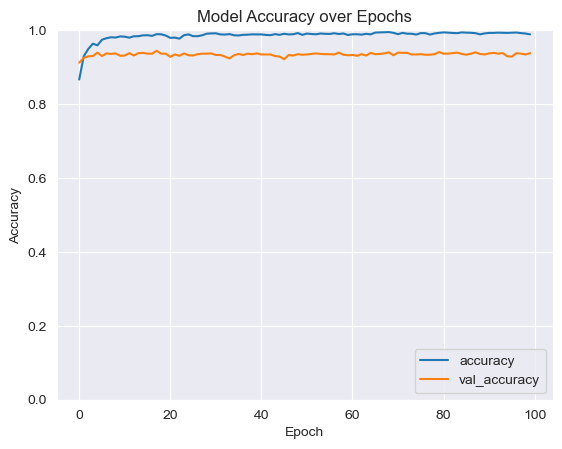

In [4]:
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the extracted features
asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/asd_features.npy')
non_asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/non_asd_features.npy')

# Create labels for the features
asd_labels = np.ones(asd_features.shape[0])
non_asd_labels = np.zeros(non_asd_features.shape[0])

# Concatenate features and labels
X = np.vstack([asd_features, non_asd_features])
y = np.concatenate([asd_labels, non_asd_labels])

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(7, 7, 512)))  # Adjust input shape to match the flattened features
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
end_time = time.time()

# Calculate training time
elapsed_time = end_time - start_time
print("Model training time:", elapsed_time, "seconds")

# Save the trained model
model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_classes, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_classes)
print("Mean Absolute Error (MAE):", mae)

# Learning Curve
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model Accuracy over Epochs')
plt.legend(loc='lower right')
plt.show()


Epoch 1/100


2024-03-30 13:21:01.364839: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


175/175 [==============================] - 4s 21ms/step - loss: 2.0785 - accuracy: 0.8765 - val_loss: 0.2173 - val_accuracy: 0.9148
Epoch 2/100
175/175 [==============================] - 4s 21ms/step - loss: 0.2079 - accuracy: 0.9296 - val_loss: 0.2349 - val_accuracy: 0.9277
Epoch 3/100
175/175 [==============================] - 4s 21ms/step - loss: 0.1481 - accuracy: 0.9470 - val_loss: 0.2341 - val_accuracy: 0.9298
Epoch 4/100
175/175 [==============================] - 3s 20ms/step - loss: 0.1284 - accuracy: 0.9536 - val_loss: 0.2181 - val_accuracy: 0.9320
Epoch 5/100
175/175 [==============================] - 4s 20ms/step - loss: 0.0985 - accuracy: 0.9610 - val_loss: 0.2107 - val_accuracy: 0.9377
Epoch 6/100
175/175 [==============================] - 4s 22ms/step - loss: 0.0732 - accuracy: 0.9692 - val_loss: 0.2520 - val_accuracy: 0.9313
Epoch 7/100
175/175 [==============================] - 3s 20ms/step - loss: 0.0653 - accuracy: 0.9726 - val_loss: 0.3333 - val_accuracy: 0.9284
Epoc

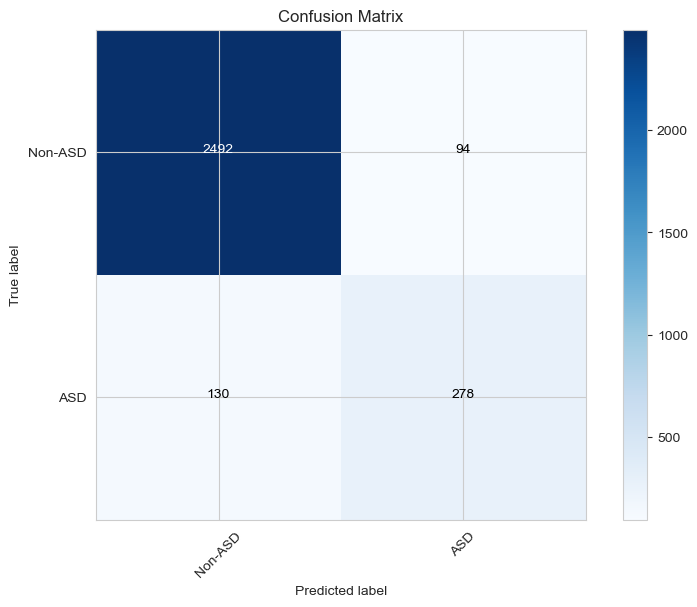

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      2586
         1.0       0.75      0.68      0.71       408

    accuracy                           0.93      2994
   macro avg       0.85      0.82      0.83      2994
weighted avg       0.92      0.93      0.92      2994


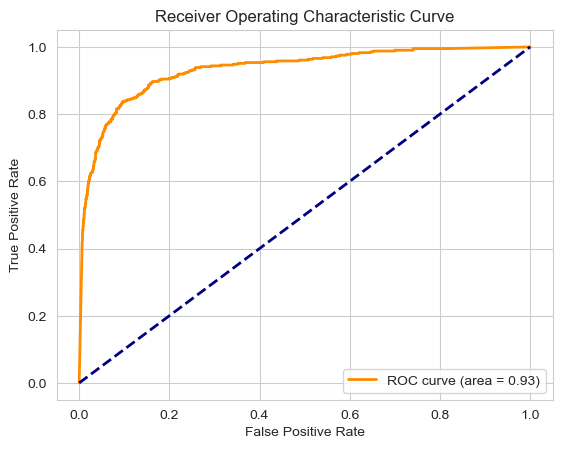

Root Mean Squared Error (RMSE): 0.2735256830083732
Mean Absolute Error (MAE): 0.07481629926519706


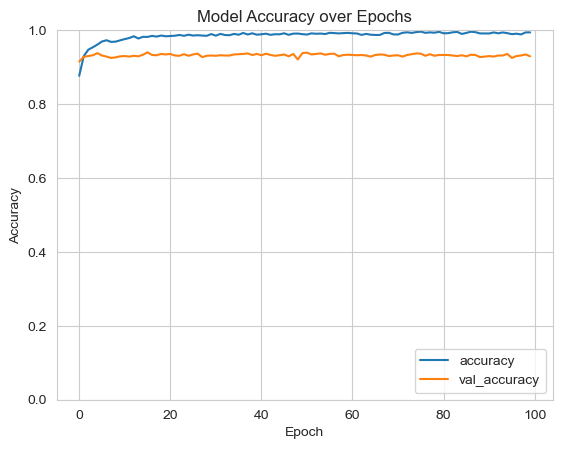

In [1]:
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the extracted features
asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/asd_features.npy')
non_asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/non_asd_features.npy')

# Create labels for the features
asd_labels = np.ones(asd_features.shape[0])
non_asd_labels = np.zeros(non_asd_features.shape[0])

# Concatenate features and labels
X = np.vstack([asd_features, non_asd_features])
y = np.concatenate([asd_labels, non_asd_labels])

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(7, 7, 512)))  # Adjust input shape to match the flattened features
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
end_time = time.time()

# Calculate training time
elapsed_time = end_time - start_time
print("Model training time:", elapsed_time, "seconds")

# Save the trained model
model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Non-ASD', 'ASD']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_classes, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_classes)
print("Mean Absolute Error (MAE):", mae)

# Learning Curve
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model Accuracy over Epochs')
plt.legend(loc='lower right')
plt.show()


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time
from tensorflow.keras.applications import VGG16


# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
vgg16_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
        return "ASD"
    else:
        return "Non-ASD"

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, vgg16)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label = predict_asd(input_image_path, vgg16_model, vgg16)
print("Predicted ASD Label:", predicted_asd_label)


1/1 [==============================] - 0s 67ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.47, 'Fear': 0.67, 'Joy': 91.62, 'Sad': 7.24}
1/1 [==============================] - 0s 26ms/step
Predicted ASD Label: ASD


In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features

# Load the pre-trained VGG16 model without top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of VGG16
model = Model(inputs=base_model.input, outputs=base_model.output)

asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD'
non_asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD'

# # Specify folder paths for emotion of child face image sets
# angry_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
# fear_folder_path = '/Users/isurudissanayake/Desktop/ASD/Fear'
# joy_folder_path = '/Users/isurudissanayake/Desktop/ASD/Happy'
# # natural_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
# sadness_folder_path = '/Users/isurudissanayake/Desktop/ASD/Sad'
# # surprise_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'

asd_features = extract_features(model, asd_folder_path)
non_asd_features = extract_features(model, non_asd_folder_path)
# Extract features for angry child faces
# angry_features = extract_features(model, angry_folder_path)
# 
# # Extract features for fear child faces
# fear_features = extract_features(model, fear_folder_path)
# 
# # Extract features for joy child faces
# joy_features = extract_features(model, joy_folder_path)
# 
# # Extract features for natural child faces
# # natural_features = extract_features(model, natural_folder_path)
# 
# # Extract features for sadness child faces
# sadness_features = extract_features(model, sadness_folder_path)

# Extract features for surprise child faces
# surprise_features = extract_features(model, surprise_folder_path)

np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/asd_features.npy', asd_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/non_asd_features.npy', non_asd_features)
# Save the extracted features for later use in training
# np.save('/Users/isurudissanayake/Desktop/FASD/Anger/Anger.npy', angry_features)
# np.save('/Users/isurudissanayake/Desktop/FASD/Fear/Fear.npy', fear_features)
# np.save('/Users/isurudissanayake/Desktop/FASD/Haapy/Happy.npy', joy_features)
# # np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy', natural_features)
# np.save('/Users/isurudissanayake/Desktop/FASD/Sad/Sad.npy', sadness_features)
# np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy', surprise_features)


1/1 [==============================] - 0s 159ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/child-1617.png: cannot identify image file <_io.BytesIO object at 0x28500ebd0>
1/1 [==============================] - 0s 161ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/additional1178.png: cannot identify image file <_io.BytesIO object at 0x2e07139f0>
1/1 [==============================] - 0s 169ms/step


In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
vgg16_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    asd_probability = round(prediction[0][0] * 100, 2)
    non_asd_probability = round((1 - prediction[0][0]) * 100, 2)

    return "ASD" if prediction > 0.5 else "Non-ASD", asd_probability, non_asd_probability

# Path to the input image
input_image_path = '/Users/isurudissanayake/Desktop/images.jpeg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, vgg16)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_probability, non_asd_probability = predict_asd(input_image_path, vgg16_model, vgg16)
print("Predicted ASD Label:", predicted_asd_label)
print("Probability of ASD:", asd_probability, "%")
print("Probability of Non-ASD:", non_asd_probability, "%")


1/1 [==============================] - 0s 61ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 2.38, 'Fear': 0.54, 'Joy': 95.02, 'Sad': 2.07}
1/1 [==============================] - 0s 36ms/step
Predicted ASD Label: Non-ASD
Probability of ASD: 0.0 %
Probability of Non-ASD: 100.0 %


In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
vgg16_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, vgg16)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, vgg16_model, vgg16)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)

1/1 [==============================] - 0s 47ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.47, 'Fear': 0.67, 'Joy': 91.62, 'Sad': 7.24}
1/1 [==============================] - 0s 41ms/step
Predicted ASD Label: ASD
ASD Percentage: 100.0


# ASD XAI LIME #

1/1 [==============================] - 0s 36ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.47, 'Fear': 0.67, 'Joy': 91.62, 'Sad': 7.24}
1/1 [==============================] - 0s 29ms/step


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


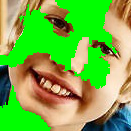

Predicted ASD Label: ASD
Probability of ASD: 100.0 %
Probability of Non-ASD: 0.0 %


In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
vgg16_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Take the output of the base model up to the last convolutional layer
x = base_model.get_layer('block5_pool').output

# Add a new dense layer for output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create a new model that takes the input of VGG16 and outputs the desired layer
lime_model = Model(inputs=base_model.input, outputs=predictions)

target_size = (224, 224)
vgg16_Img_scaled = None

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global vgg16_Img_scaled

    # Process the input image
    limeImg = np.array(Image.open(image_path).resize(target_size))
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    limeImg = np.expand_dims(limeImg, axis=0)  # Add a batch dimension
    limeImg = preprocess_input(limeImg)  # Preprocess the image

    # Preprocess the image for the explainer by dividing pixel values by 255
    vgg16_Img_scaled = limeImg / 255.0
    
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    global vgg16_Img_scaled
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Check if prediction is ASD or Non-ASD
    if prediction[0][0] > 0.5:

        predicted_asd_label = "ASD"
        asd_probability = round(float(prediction[0][0]) * 100, 2)
        non_asd_probability = 100 - asd_probability

        explainer = LimeImageExplainer()

        # Generate an explanation for the prediction using the explainer object
        explanation = explainer.explain_instance(vgg16_Img_scaled[0], lime_model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

        # Visualize the explanation using matplotlib
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

        # Resize the explanation mask to match the original image dimensions
        mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

        # Convert the mask to the original image mode
        original_image = Image.open(image_path)
        #original_image = original_image.convert("L")  # Convert the original image to grayscale
        original_width, original_height = original_image.size
        original_mode = original_image.mode

        # Overlay the explanation mask on the original image
        mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
        original_image = np.array(original_image)
        original_image[mask > 0.5] = (0, 255, 0)

        # Display the original image with the explanation mask
        display(Image.fromarray(original_image))
        
    else:
        predicted_asd_label = "Non-ASD"
        non_asd_probability = round(float(1 - prediction[0][0]) * 100, 2)
        asd_probability = 100 - non_asd_probability

    return predicted_asd_label, asd_probability, non_asd_probability

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, vgg16)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_probability, non_asd_probability = predict_asd(input_image_path, vgg16_model, vgg16)
print("Predicted ASD Label:", predicted_asd_label)
print("Probability of ASD:", asd_probability, "%")
print("Probability of Non-ASD:", non_asd_probability, "%")

# ASD XAI Grad-CAM #

1/1 [==============================] - 0s 194ms/step


2024-03-27 22:38:30.177201: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 25ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.47, 'Fear': 0.67, 'Joy': 91.62, 'Sad': 7.24}
1/1 [==============================] - 0s 19ms/step


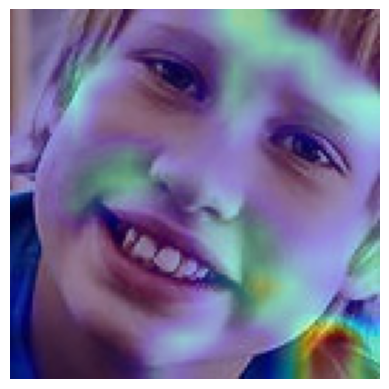

Predicted ASD Label: ASD
Probability of ASD: 100.0 %
Probability of Non-ASD: 0.0 %


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
vgg16_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Take the output of the base model up to the last convolutional layer
x = base_model.get_layer('block5_pool').output

# Add a new dense layer for output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create a new model that takes the input of VGG16 and outputs the desired layer
vgg16Model = Model(inputs=base_model.input, outputs=predictions)

target_size = (224, 224)
vgg16_Img_scaled = None

vgg16_grad_img_original = None
vgg16_grad_img_for_model = None
vgg16_grad_img_scaled = None

# Define Grad-CAM function
def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global vgg16_Img_scaled
    global vgg16_grad_img_original
    global vgg16_grad_img_for_model
    global vgg16_grad_img_scaled

    GradImg = cv2.imread(input_image_path)
    vgg16_grad_img_original = GradImg.copy()  # Save a copy for visualization later
    GradImg = cv2.resize(GradImg, target_size)
    vgg16_grad_img_for_model = preprocess_input(np.expand_dims(image.img_to_array(GradImg), axis=0))
    
    # Preprocess the image for the explainer by dividing pixel values by 255
    vgg16_grad_img_scaled = GradImg / 255.0

    # Process the input image
    limeImg = np.array(Image.open(image_path).resize(target_size))
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    limeImg = np.expand_dims(limeImg, axis=0)  # Add a batch dimension
    limeImg = preprocess_input(limeImg)  # Preprocess the image

    # Preprocess the image for the explainer by dividing pixel values by 255
    vgg16_Img_scaled = limeImg / 255.0

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    global vgg16_Img_scaled
    global vgg16_grad_img_original
    global vgg16_grad_img_for_model
    global vgg16_grad_img_scaled
    
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Check if prediction is ASD or Non-ASD
    if prediction[0][0] > 0.5:

        predicted_asd_label = "ASD"
        asd_probability = round(float(prediction[0][0]) * 100, 2)
        non_asd_probability = 100 - asd_probability

        # Visualize the Grad-CAM heatmap
        heatmap = generate_grad_cam(vgg16Model, vgg16_grad_img_for_model, 'block5_conv3')

        # Resize heatmap to match the size of the original image
        heatmap = cv2.resize(heatmap, (vgg16_grad_img_original.shape[1], vgg16_grad_img_original.shape[0]))

        # Apply colormap for better visualization
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # Superimpose the heatmap on the original image
        superimposed_img = cv2.addWeighted(vgg16_grad_img_original, 0.6, heatmap, 0.4, 0)

        # Display the superimposed image
        plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # explainer = LimeImageExplainer()
        # 
        # # Generate an explanation for the prediction using the explainer object
        # explanation = explainer.explain_instance(vgg16_Img_scaled[0], vgg16Model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)
        # 
        # # Visualize the explanation using matplotlib
        # temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
        # 
        # # Resize the explanation mask to match the original image dimensions
        # mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)
        # 
        # # Convert the mask to the original image mode
        # original_image = Image.open(image_path)
        # #original_image = original_image.convert("L")  # Convert the original image to grayscale
        # original_width, original_height = original_image.size
        # original_mode = original_image.mode
        # 
        # # Overlay the explanation mask on the original image
        # mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
        # original_image = np.array(original_image)
        # original_image[mask > 0.5] = (0, 255, 0)
        # 
        # # Display the original image with the explanation mask
        # display(Image.fromarray(original_image))

    else:
        predicted_asd_label = "Non-ASD"
        non_asd_probability = round(float(1 - prediction[0][0]) * 100, 2)
        asd_probability = 100 - non_asd_probability

    return predicted_asd_label, asd_probability, non_asd_probability

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, vgg16)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_probability, non_asd_probability = predict_asd(input_image_path, vgg16_model, vgg16)
print("Predicted ASD Label:", predicted_asd_label)
print("Probability of ASD:", asd_probability, "%")
print("Probability of Non-ASD:", non_asd_probability, "%")

# Emotion XAI LIME #

2024-03-27 23:29:13.726803: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 34ms/step


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


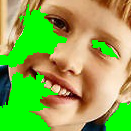

Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.47, 'Fear': 0.67, 'Joy': 91.62, 'Sad': 7.24}
1/1 [==============================] - 0s 68ms/step
Predicted ASD Label: ASD
Probability of ASD: 100.0 %
Probability of Non-ASD: 0.0 %


In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
vgg16_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Take the output of the base model up to the last convolutional layer
x = base_model.get_layer('block5_pool').output

# Add a new dense layer for output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create a new model that takes the input of VGG16 and outputs the desired layer
lime_model = Model(inputs=base_model.input, outputs=predictions)

target_size = (224, 224)
vgg16_Img_scaled = None

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global vgg16_Img_scaled

    # Process the input image
    limeImg = np.array(Image.open(image_path).resize(target_size))
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    limeImg = np.expand_dims(limeImg, axis=0)  # Add a batch dimension
    limeImg = preprocess_input(limeImg)  # Preprocess the image

    # Preprocess the image for the explainer by dividing pixel values by 255
    vgg16_Img_scaled = limeImg / 255.0

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    global vgg16_Img_scaled
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    explainer = LimeImageExplainer()

    # Generate an explanation for the prediction using the explainer object
    explanation = explainer.explain_instance(vgg16_Img_scaled[0], lime_model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

    # Visualize the explanation using matplotlib
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    # Resize the explanation mask to match the original image dimensions
    mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

    # Convert the mask to the original image mode
    original_image = Image.open(image_path)
    #original_image = original_image.convert("L")  # Convert the original image to grayscale
    original_width, original_height = original_image.size
    original_mode = original_image.mode

    # Overlay the explanation mask on the original image
    mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    original_image = np.array(original_image)
    original_image[mask > 0.5] = (0, 255, 0)

    # Display the original image with the explanation mask
    display(Image.fromarray(original_image))

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Check if prediction is ASD or Non-ASD
    if prediction[0][0] > 0.5:

        predicted_asd_label = "ASD"
        asd_probability = round(float(prediction[0][0]) * 100, 2)
        non_asd_probability = 100 - asd_probability

    else:
        predicted_asd_label = "Non-ASD"
        non_asd_probability = round(float(1 - prediction[0][0]) * 100, 2)
        asd_probability = 100 - non_asd_probability

    return predicted_asd_label, asd_probability, non_asd_probability

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, vgg16)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_probability, non_asd_probability = predict_asd(input_image_path, vgg16_model, vgg16)
print("Predicted ASD Label:", predicted_asd_label)
print("Probability of ASD:", asd_probability, "%")
print("Probability of Non-ASD:", non_asd_probability, "%")

# Emotion Grad-Cam #

1/1 [==============================] - 0s 28ms/step


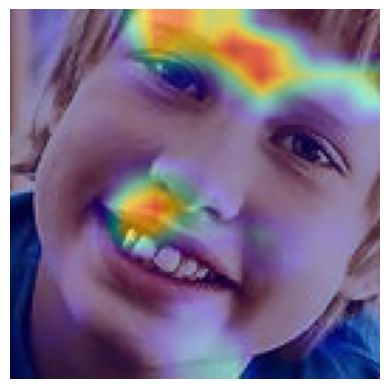

Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.47, 'Fear': 0.67, 'Joy': 91.62, 'Sad': 7.24}
1/1 [==============================] - 0s 41ms/step
Predicted ASD Label: ASD
Probability of ASD: 100.0 %
Probability of Non-ASD: 0.0 %


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
vgg16_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Take the output of the base model up to the last convolutional layer
x = base_model.get_layer('block5_pool').output

# Add a new dense layer for output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create a new model that takes the input of VGG16 and outputs the desired layer
vgg16Model = Model(inputs=base_model.input, outputs=predictions)

target_size = (224, 224)
vgg16_Img_scaled = None

vgg16_grad_img_original = None
vgg16_grad_img_for_model = None
vgg16_grad_img_scaled = None

# Define Grad-CAM function
def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global vgg16_Img_scaled
    global vgg16_grad_img_original
    global vgg16_grad_img_for_model
    global vgg16_grad_img_scaled

    GradImg = cv2.imread(input_image_path)
    vgg16_grad_img_original = GradImg.copy()  # Save a copy for visualization later
    GradImg = cv2.resize(GradImg, target_size)
    vgg16_grad_img_for_model = preprocess_input(np.expand_dims(image.img_to_array(GradImg), axis=0))

    # Preprocess the image for the explainer by dividing pixel values by 255
    vgg16_grad_img_scaled = GradImg / 255.0

    # Process the input image
    limeImg = np.array(Image.open(image_path).resize(target_size))
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    limeImg = np.expand_dims(limeImg, axis=0)  # Add a batch dimension
    limeImg = preprocess_input(limeImg)  # Preprocess the image

    # Preprocess the image for the explainer by dividing pixel values by 255
    vgg16_Img_scaled = limeImg / 255.0

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    global vgg16_grad_img_original
    global vgg16_grad_img_for_model
    global vgg16_grad_img_scaled
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    # Visualize the Grad-CAM heatmap
    heatmap = generate_grad_cam(vgg16Model, vgg16_grad_img_for_model, 'block5_conv3')

    # Resize heatmap to match the size of the original image
    heatmap = cv2.resize(heatmap, (vgg16_grad_img_original.shape[1], vgg16_grad_img_original.shape[0]))

    # Apply colormap for better visualization
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(vgg16_grad_img_original, 0.6, heatmap, 0.4, 0)

    # Display the superimposed image
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    global vgg16_Img_scaled


    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Check if prediction is ASD or Non-ASD
    if prediction[0][0] > 0.5:

        predicted_asd_label = "ASD"
        asd_probability = round(float(prediction[0][0]) * 100, 2)
        non_asd_probability = 100 - asd_probability

        
    else:
        predicted_asd_label = "Non-ASD"
        non_asd_probability = round(float(1 - prediction[0][0]) * 100, 2)
        asd_probability = 100 - non_asd_probability

    return predicted_asd_label, asd_probability, non_asd_probability

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, vgg16)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_probability, non_asd_probability = predict_asd(input_image_path, vgg16_model, vgg16)
print("Predicted ASD Label:", predicted_asd_label)
print("Probability of ASD:", asd_probability, "%")
print("Probability of Non-ASD:", non_asd_probability, "%")